# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

Student intervention is a classification problem.  The output variable is binary - either the algorithm recommends that the student needs or does not need help based on its expectation for the student graduate or not.

If the objective was to predict final GPA, which is a continuous variable, then regression might have been the correct approach for the problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1

# TODO: Calculate passing students
n_passed = sum(1.0 for student in student_data['passed'] if student == 'yes')

# TODO: Calculate failing students
n_failed = n_students - n_passed

# TODO: Calculate graduation rate
grad_rate = 100 * n_passed / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265.0
Number of students who failed: 130.0
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=95, train_size=300)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

The supervised learning models that are appropriate for this problem are Support Vector Machines, Gaussian Naive Bayes, and Random Forests. 

Support Vector Machines

SVM's have broad applications in healthcare research and bioinformatics.  Using "diabetes risk variables such as family history, age, gender, race and ethnicity, weight, height, waist circumference, BMI, hypertension, physical activity, smoking, alcohol use, education, and household income," researchers have used SVMs to identify both cases of diabetes and pre-diabetes.<sup>1</sup>

A strength of the SVM is the ability to remain effective even in high dimension spaces, which is helpful as the student intervention dataset has 300 training examples and  30 features (48 features after conversion of categorical variables).  This is not a high dimensional space, but the number of features is high relative to number of training examples.  Training is relatively easy and the trade-off between complexity and overfitting can be manually controlled using the 'C' parameter.  The 'kernel trick' can be used to transform data to a higher dimension so that it is linearly separable.  In theory, the SVM seeks to find a high-margin classifier, so it naturally works against over-fitting.  The algorithm is also relatively tolerant of diverse input feature data.

The weaknesses of SVMs are they can be slow to train and the user may need to optimize the parameters of 'C' and 'gamma' to achieve the best classification results.  The memory requirements for the algorithm are high.  SVM's perform poorly when the classes are highly skewed or when there are multiple classes.  The dataset is only slightly skewed with 2/3 of the population passing and 1/3 failing.  SVM's also perform poorly if features are not properly scaled.  This should not be a problem in the dataset as most of the data is categorical.  The only feature which might benefit from scaling is absences.  Lastly, depending on the kernel, an SVM might overfit the data.

Gaussian Naive Bayes

Gaussian Naive Bayes Classification can be applied to spam/ham email categorization, text recognition, and image recognition.  This algorithm can also be used to "automatically identifying stroke lesions in individual T1-weighted MRI scans... Probabilistic tissue segmentation and image algebra were used to create feature maps encoding information about missing and abnormal tissue."<sup>2</sup>

The greatest atraction of Gaussian Naive Bayes is that it is simple, fast to train/classify, and performs reasonbaly well for its straightforwardness.  Further benefits of this approach are that it works well with categorical input variables and small data sets, which are two features in the data.  Most of the 48 features in the dataset are categorical and the number of data points present is low relative to the feature set.  Naive Bayes also is less prone to overfitting as the hypothesis is simple, and errs on the side of high bias.  It can also classify correctly even if the strong independence assumptions are violated, which could be the case for several features relating to the student's family and socioeconomic background.

Paradoxically, demerits of Naive Bayes include the fact that if independence assumptions do not hold, the classifier could perform poorly (though frequently it still performs well).  In addition, the learner cannot accurately model interactions between features.  The features use should be normally distributed, however, in the dataset, this assumption is violated by absences and age (see histograms in the next cell).  Lastly, because it does not overfit, the algorithm exihibits low variance.  It may be difficult to improve the algorithm by adding training examples.

Random Forests

Random Forests are a relatively new innovation in machine learning, and are an ensemble of categorization trees.  Some applications include classification of internet traffic, bioinformatics (gene expression classification, mass spectrum protein expression analysis, biomarker discovery, sequence annotation, protein-protein interaction prediction), and customer segmentation.  A specific application is using environmental variables (topograhpy and weather) to predict the presence of invasive species.<sup>3</sup>

An advantage of random forests is that it is ideal for complex classification problems and easy to use with minimal tinkering.  With many trees 'voting' for classification features, random forests will not overfit the way a categorization and regression tree can.  The number of trees generated ensures that high-bias trees and high-variance trees will not skew the classification.  The algorithm works well with large databases (high dimensional spaces and a large number of training examples).  

A disadvantage of RF is that a large number of trees may slow down real-time learning.  The method has also been known to overfit noisy classification tasks.  Conversely, because it is easy to use, there are few parameters to tune and the modeler has very little control over the learning algorithm.

Footnotes:
1.  http://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-10-16
2.  http://www.sciencedirect.com/science/article/pii/S0165027015003520
3.  http://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1805&context=wild_facpub

(array([ 88.,   3.,  43.,   6.,  43.,   2.,  23.,   6.,  18.,   3.,  14.,
          3.,   9.,   3.,   8.,   2.,   5.,   0.,   5.,   1.,   3.,   0.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.

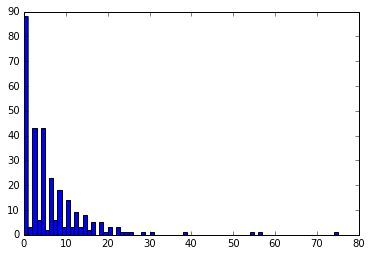

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X_train['absences'], bins=75)

#### Comments
There is a strange pattern in the absences histogram, where the values alternate between high and low between 0 and 20.  This could be a sign of corrupted data.

(array([ 61.,  79.,  78.,  63.,  14.,   3.,   2.]),
 array([ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.]),
 <a list of 7 Patch objects>)

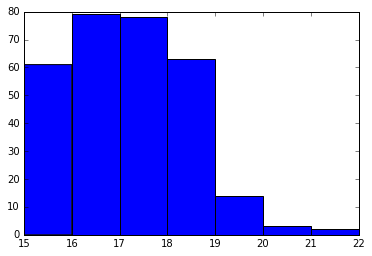

In [8]:
plt.hist(X_train['age'], bins=7)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [9]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [12]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
# Set random state = 37 so results are replicable
clf_A = SVC(random_state=37)
clf_B = GaussianNB()
clf_C = RandomForestClassifier(random_state=37)

clf_list = [clf_A, clf_B, clf_C]

# TODO: Set up the training set sizes
X_train_100 = X_train.iloc[:100]
y_train_100 = y_train.iloc[:100]

X_train_200 = X_train.iloc[:200]
y_train_200 = y_train.iloc[:200]

train_datasets = [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train, y_train)]
# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for m in clf_list:
    print('#############')
    print('\n')
    for k in train_datasets:
        train_predict(m, k[0], k[1], X_test, y_test)
        print('\n')

#############


Training a SVC using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8642.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8050.


Training a SVC using a training set size of 200. . .
Trained model in 0.0000 seconds
Made predictions in 0.0160 seconds.
F1 score for training set: 0.8808.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8188.


Training a SVC using a training set size of 300. . .
Trained model in 0.0150 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8701.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8212.


#############


Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8058.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7597.


Training a GaussianNB using a training set size of 200. . .
T

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0000         |         0.0000         |      0.8642      |     0.8050      |
| 200               |          0.0000         |         0.0000         |      0.8808      |     0.8188      |
| 300               |          0.0150         |         0.0000         |      0.8701      |     0.8212      |

** Classifer 2 - Gaussian Naive Bayes **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0000         |         0.0000         |      0.8058      |     0.7597      |
| 200               |          0.0000         |         0.0000         |      0.8044      |     0.7597      |
| 300               |          0.0000         |         0.0000         |      0.8213      |     0.7820      |

** Classifer 3 -  Random Forests **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0310         |         0.0000         |      1.0000      |     0.6929      |
| 200               |          0.0310         |         0.0000         |      0.9963      |     0.7820      |
| 300               |          0.0320         |         0.0000         |      0.9926      |     0.7442      |

#### Comments
Given the benefits of the random forests model, it is suprising that the resulting F1 score exhibits signs of overfitting.  The F1 training score is very high while the F1 test score doesn't exhibit any improvement with increasing training size.  In the future, it may be helpful to run the experiment with a different initial random seed/state.

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Based upon the experiments, the model that should be chosen is the Support Vector Machine classifier.  The criteria for choosing the best model is the array of F1 scores using the test data.  The F1 score, which is the harmonic mean of precision and recall, serves as a good metric of accuracy for the classifier.  The F1 score for the test data, and not the training data, is utilized as the learning algorithm has not 'seen' the test data.  Thus, overfitting of the training data can be avoided and the choice of classifier can be objective.

Given the available data, resources, cost and performance, the SVM is most appropriate.  The training and testing of the dataset did not take very long and will not require a large amount of computing resources or energy.  Resources will not constrain the choice of classifier.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

The Support Vector Machine classifier works by looking at training data points and finding a boundary which can divide one group (passing students) from another (failing students).  Furthermore, the algorithm works to maximize the distance between data points which are close to the boundary.  This gives the boundary a 'buffer' which is as large as possible from the nearest points.  Another way to state this is the algorithm places the highest importance on 'difficult' training data points which are closest to the opposite group when drawing the dividing line.

Once the boundary is chosen using the training data, test data points are overlaid in the same exact space, and the pre-existing boundary is used to classify them to one group or the other.  Since the algorithm has tried to find a boundary which has the maximum buffer possible, it can make highly accurate predictions on test data.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [16]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':('linear', 'poly', 'sigmoid', 'rbf'), 'C':[0.01, 0.05, 0.025, 1, 5, 25, 125, 625], \
              'gamma':[0.01, 0.05, 0.025, 1, 5, 25, 125, 625]}

# TODO: Initialize the classifier
clf = SVC(random_state=37)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

# Printing best parameters
print "Best parameters: ", grid_obj.best_params_

Made predictions in 0.0150 seconds.
Tuned model has a training F1 score of 0.8720.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8267.
Best parameters:  {'kernel': 'rbf', 'C': 1, 'gamma': 0.025}


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Interestingly, the best parameters are nearly identical to the default settings of SVC().

The final model's F1 score for training is 0.8720, which is similar to the untuned model at 0.8701.  The testing score is 0.8267, which is marginally better than the untuned model at 0.8212.  In production, it would be best to verify the parameters learned from grid search with k-fold cross-validation to ensure that the model is not over-fitted.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.